# Detecting Cotton Plant Disease Using ConvNets

### Importing the libraries

In [9]:
import numpy as np 
import pandas as pd
import os
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
train_data_path = r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\train"
test_data_path = r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\test"

In [11]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [12]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [14]:
test_data = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='categorical')

Found 106 images belonging to 4 classes.


### Building the CNN Model

In [15]:
model = keras.models.Sequential([
keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.Conv2D(filters=64, kernel_size=3),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.Conv2D(filters=128, kernel_size=3),
keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
keras.layers.Conv2D(filters=256, kernel_size=3),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.Conv2D(filters=512, kernel_size=3),
keras.layers.MaxPooling2D(pool_size=(2,2)),

keras.layers.Dropout(0.5),                                                                        
keras.layers.Flatten(), 
keras.layers.Dense(units=128, activation='relu'), 
keras.layers.Dropout(0.1),                                    
keras.layers.Dense(units=256, activation='relu'),                                    
keras.layers.Dropout(0.25),                                    
keras.layers.Dense(units=4, activation='softmax') 
])

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data=test_data,
                          )

Epoch 1/50
61/61 [==============================] - 113s 2s/step - loss: 1.2573 - accuracy: 0.4464 - val_loss: 1.2225 - val_accuracy: 0.5472
Epoch 2/50
61/61 [==============================] - 89s 1s/step - loss: 1.0642 - accuracy: 0.5464 - val_loss: 1.0087 - val_accuracy: 0.5094
Epoch 3/50
61/61 [==============================] - 89s 1s/step - loss: 0.9254 - accuracy: 0.6212 - val_loss: 1.1621 - val_accuracy: 0.4717
Epoch 4/50
61/61 [==============================] - 88s 1s/step - loss: 0.8742 - accuracy: 0.6520 - val_loss: 1.0038 - val_accuracy: 0.5849
Epoch 5/50
61/61 [==============================] - 90s 1s/step - loss: 0.8456 - accuracy: 0.6607 - val_loss: 1.0011 - val_accuracy: 0.5566
Epoch 6/50
61/61 [==============================] - 90s 1s/step - loss: 0.8435 - accuracy: 0.6561 - val_loss: 1.0106 - val_accuracy: 0.5849
Epoch 7/50
61/61 [==============================] - 92s 1s/step - loss: 0.8271 - accuracy: 0.6668 - val_loss: 0.8099 - val_accuracy: 0.6509
Epoch 8/50
61/61 [=

### Plotting the Accuracy & Loss Plots

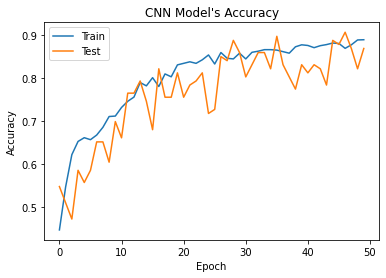

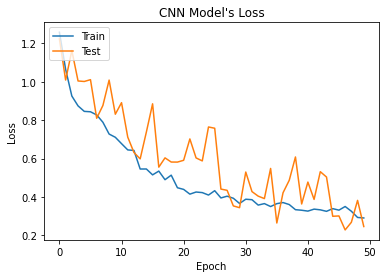

In [19]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model\'s Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model\'s Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Defining the Image Classification Function

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
IMAGE_SIZE =(150,150)

def predictor(image_location):
  test_image=image.load_img(image_location, target_size = IMAGE_SIZE)
  plt.imshow(test_image)
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)

  preds=np.argmax(model.predict(test_image))
  if preds==0:
    print("The leaf is diseased cotton leaf")
  elif preds==1:
    print("The leaf is diseased cotton plant")
  elif preds==2:
    print("The leaf is fresh cotton leaf")
  else:
    print("The leaf is fresh cotton plant")

#### TEST 1

The leaf is diseased cotton leaf


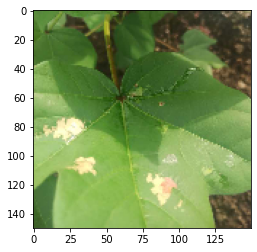

In [23]:
predictor(r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\test\diseased cotton leaf\dis_leaf (258)_iaip.jpg")

#### TEST 2

The leaf is diseased cotton plant


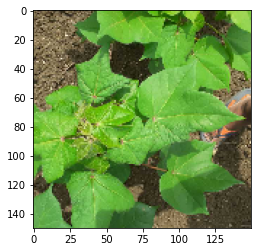

In [24]:
predictor(r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\test\diseased cotton plant\dd (318)_iaip.jpg")

#### TEST 3

The leaf is fresh cotton leaf


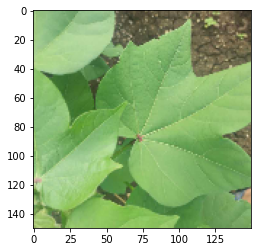

In [26]:
predictor(r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\test\fresh cotton leaf\d (122)_iaip.jpg")

#### TEST 4

The leaf is diseased cotton plant


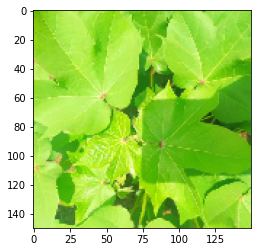

In [27]:
predictor(r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\test\fresh cotton plant\dsd (465)_iaip.jpg")

### Validating the Test Set

In [28]:
validation_path = (r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\val")

In [29]:
valid_data = test_datagen.flow_from_directory(validation_path, target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 253 images belonging to 4 classes.


In [30]:
predicted = model.predict(valid_data[0][0])

In [31]:
actual=[]
for i in valid_data[0][1]:
  actual.append(np.argmax(i))

predict=[]
for i in predicted:
  predict.append(np.argmax(i))

In [32]:
from sklearn.metrics import accuracy_score
print( "CNN Model's Accuracy", accuracy_score(actual, predict))

CNN Model's Accuracy 0.9375


### Saving the CNN Model

In [33]:
model.save("Cotton-CNN-Model.h5")